<a href="https://colab.research.google.com/github/FediBeltaief/Machine-Learning/blob/main/tp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.preprocessing import StandardScaler



In [ ]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')
print('Dimension du dataset:', X.shape)
print('\nApprecu des donneés:')
display(X.head())
print ("\n Repartition des classes:")
print(y.value_counts())


Dimension du dataset: (150, 4)

Apprecu des donneés:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



 Repartition des classes:
target
0    50
1    50
2    50
Name: count, dtype: int64


Accuracy: 0.9666666666666667
Precision: 0.9722222222222222
Recall: 0.9629629629629629
F1-score: 0.9658994032395567


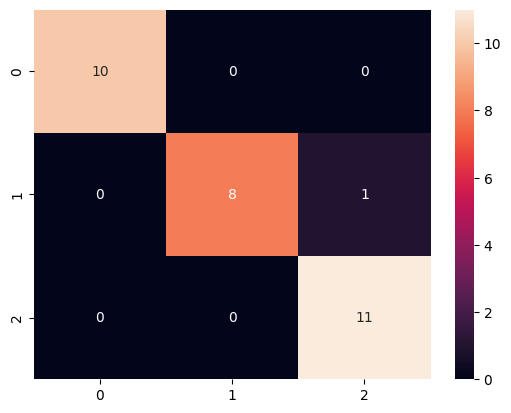

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


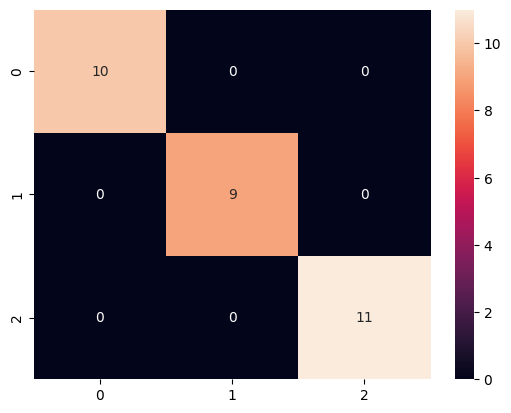

Accuracy: 1.0


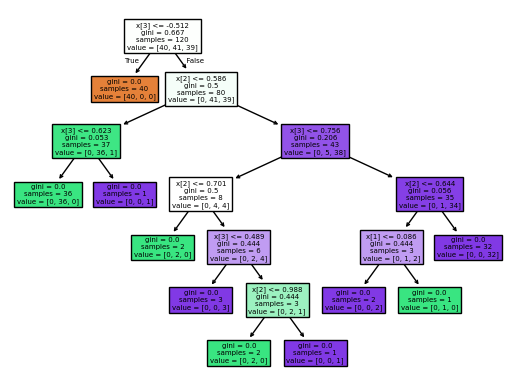

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
List=['linear','rbf']
for i in List:
  model_selection=SVC(kernel=i)
  model_selection.fit(X_train,y_train)
  y_pred=model_selection.predict(X_test)
  print ("Accuracy:",accuracy_score(y_test,y_pred))
  print ("Precision:",precision_score(y_test,y_pred,average='macro'))
  print ("Recall:",recall_score(y_test,y_pred,average='macro'))
  print ("F1-score:",f1_score(y_test,y_pred,average='macro'))
  #ConfusionMatrixDisplay.from_estimator(model_selection,X_test,y_test)
  sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
  plt.show()
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
print ("Accuracy:",accuracy_score(y_test,y_pred))
plot_tree(tree,filled=True)
plt.show()
kneighbors_graph=KNeighborsClassifier(n_neighbors=3)
kneighbors_graph.fit(X_train,y_train)
y_pred=kneighbors_graph.predict(X_test)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_path='content/drive/MyDrive/Covid19-dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder, StandardScaler

import os



In [ ]:
def load_images_from_folder(folder,label,size=(64,64)):
  images = []
  labels = []
  for filename in os.listdir(folder):
    path = os.path.join(folder,filename)
    try:
      img = load_img(path,target_size=size, color_mode='grayscale')
      img_array =img_to_array(img).flatten()
      images.append(img_array)
      labels.append(label)
    except:
      continue
  return images,labels

In [ ]:
train_covid = os.path.join(data_path,'train/Covid')
train_normal = os.path.join(data_path,'train/Normal')
test_covid = os.path.join(data_path,'test/Covid')
test_normal = os.path.join(data_path,'test/Normal')

In [ ]:


data_path='/content/drive/MyDrive/Covid19-dataset'
train_covid = os.path.join(data_path,'train/Covid')
train_normal = os.path.join(data_path,'train/Normal')
test_covid = os.path.join(data_path,'test/Covid')
test_normal = os.path.join(data_path,'test/Normal')

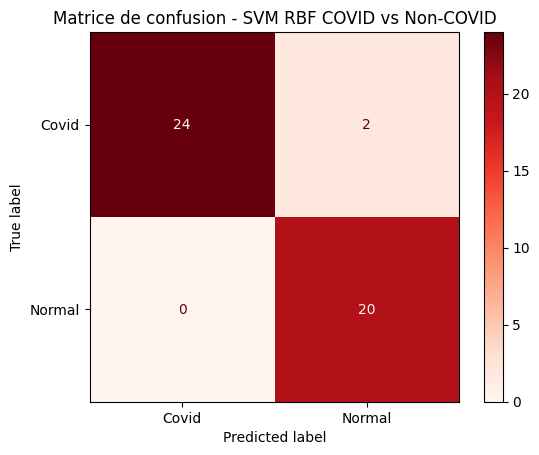

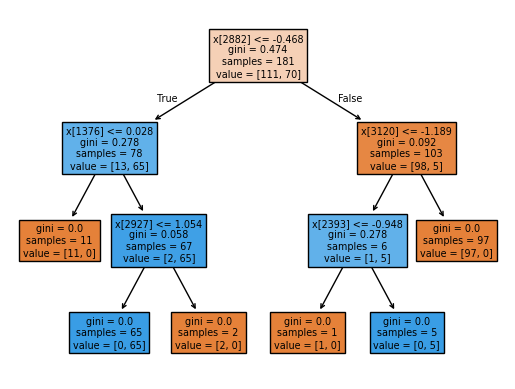

Predicted   0   1  All
Actual                
0          25   1   26
1           3  17   20
All        28  18   46
Accuracy: 0.9565217391304348
Precision: 0.9565217391304348
Recall: 0.9565217391304348
F1-score: 0.9565217391304348


In [ ]:
X_train_covid,y_train_covid = load_images_from_folder(train_covid,"Covid")
X_train_normal,y_train_normal = load_images_from_folder(train_normal,"Normal")
X_test_covid,y_test_covid = load_images_from_folder(test_covid,"Covid")
X_test_normal,y_test_normal = load_images_from_folder(test_normal,"Normal")

X_train = np.array(X_train_covid + X_train_normal)
y_train = np.array(y_train_covid + y_train_normal)
X_test = np.array(X_test_covid + X_test_normal)
y_test = np.array(y_test_covid + y_test_normal)


le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train_enc)
y_pred = svm_model.predict(X_test_scaled)
cm = confusion_matrix(y_test_enc, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Reds)
plt.title("Matrice de confusion - SVM RBF COVID vs Non-COVID")
plt.show()

accuracy = accuracy_score(y_test_enc, y_pred)
precision = precision_score(y_test_enc, y_pred, average='micro')
recall = recall_score(y_test_enc, y_pred, average='micro')
f1 = f1_score(y_test_enc, y_pred, average='micro')
tree = DecisionTreeClassifier()
tree.fit(X_train_scaled, y_train_enc)
y_pred = tree.predict(X_test_scaled)
plot_tree(tree, filled=True)
plt.show()
classification_report = pd.crosstab(y_test_enc, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(classification_report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
